In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = ("aviation-accidents.csv")
df = pd.read_csv(dataset)
df
#Importiamo le librerie che utilizzeremo nell'analisi dei dati, 
#e creiamo il data frame importando il file csv

In [ ]:
df.isnull().sum()
#Andiamo a verificare quanti valori nulli ci sono sulle colonne per poter poi operare sul data frame

In [95]:
df_fatalities_drop = df['fatalities'].dropna()
#come prima cosa andiamo a rimuovere i valori Nan

def calculate_fatalities(fatalities):
    if '+' in fatalities:
        parts = fatalities.split('+')
        return int(parts[0]) + int(parts[1])
    else:
        return int(fatalities)
df_fatalities_drop = df_fatalities_drop.apply(calculate_fatalities)
#Visto che nella colonna fatalities ci sono molti dati elencati nel formato "n+n"
#creiamo una funzione che vada a dividere le stringhe così rappresentate in due interi sommandoli

In [19]:
#Prima di applicare la funzione andiamo a calcolare la media delle vittime per sostituirla ai valori mancanti
fatalities_mean = round(df_fatalities_drop.mean())
fatalities_mean

df_f = df.copy()
#applichiamo la funzione alla copia del data frame originale
fatalities_mean = str(fatalities_mean)
df_f['fatalities'] = df_f['fatalities'].fillna(fatalities_mean)
df_f['fatalities'] = df_f['fatalities'].apply(calculate_fatalities)

In [20]:
#riempiamo i valori vuoti delle altre colonne con "oggetto sconosciuto"
df_f['location'] = df_f['location'].fillna("unknown location")
df_f['operator'] = df_f['operator'].fillna("unknown operator")
df_f

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,7,unknown location,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,7,unknown location,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,7,unknown location,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,7,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [21]:
df_f.isnull().sum()
#verifichiamo che i valori Nan si siano azzerati

date               0
type               0
registration    1548
operator           0
fatalities         0
location           0
country            0
cat                0
year               0
dtype: int64

In [ ]:
#creiamo il primo grafico
plt.style.use('dark_background')
plt.figure(figsize = (15, 10))
plt.plot(accident_count_by_year.index, accident_count_by_year.values, linewidth=2, color='red')
plt.xlabel("Year", size = 18)
plt.ylabel("Accident count", size = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.title("Plane crashes per year", size = 30, fontweight='bold',pad=40)
plt.annotate("Year 1944 had the highest number of accidents", xy = (1975, 1450), size = 18, fontstyle='italic')
plt.show()

In [94]:

plt.style.use('dark_background')
plt.figure(figsize = (15, 10))
filtered_df = df_f[df_f['country'] != "Unknown country"]
acciident_count_by_country = filtered_df['country'].value_counts()
top_countries = accident_count_by_country.head(10)
plt.bar(top_countries.index, top_countries.values)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Incident Count", fontsize=18)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.title("Top 10 Countries by incident Count", size=30, fontweight='bold', pad=40)
plt.annotate("USA is the country with most accidents", xy = ("Brazil", 4200), size = 20, fontstyle='italic')
plt.show()

NameError: name 'accident_count_by_country' is not defined

<Figure size 1500x1000 with 0 Axes>

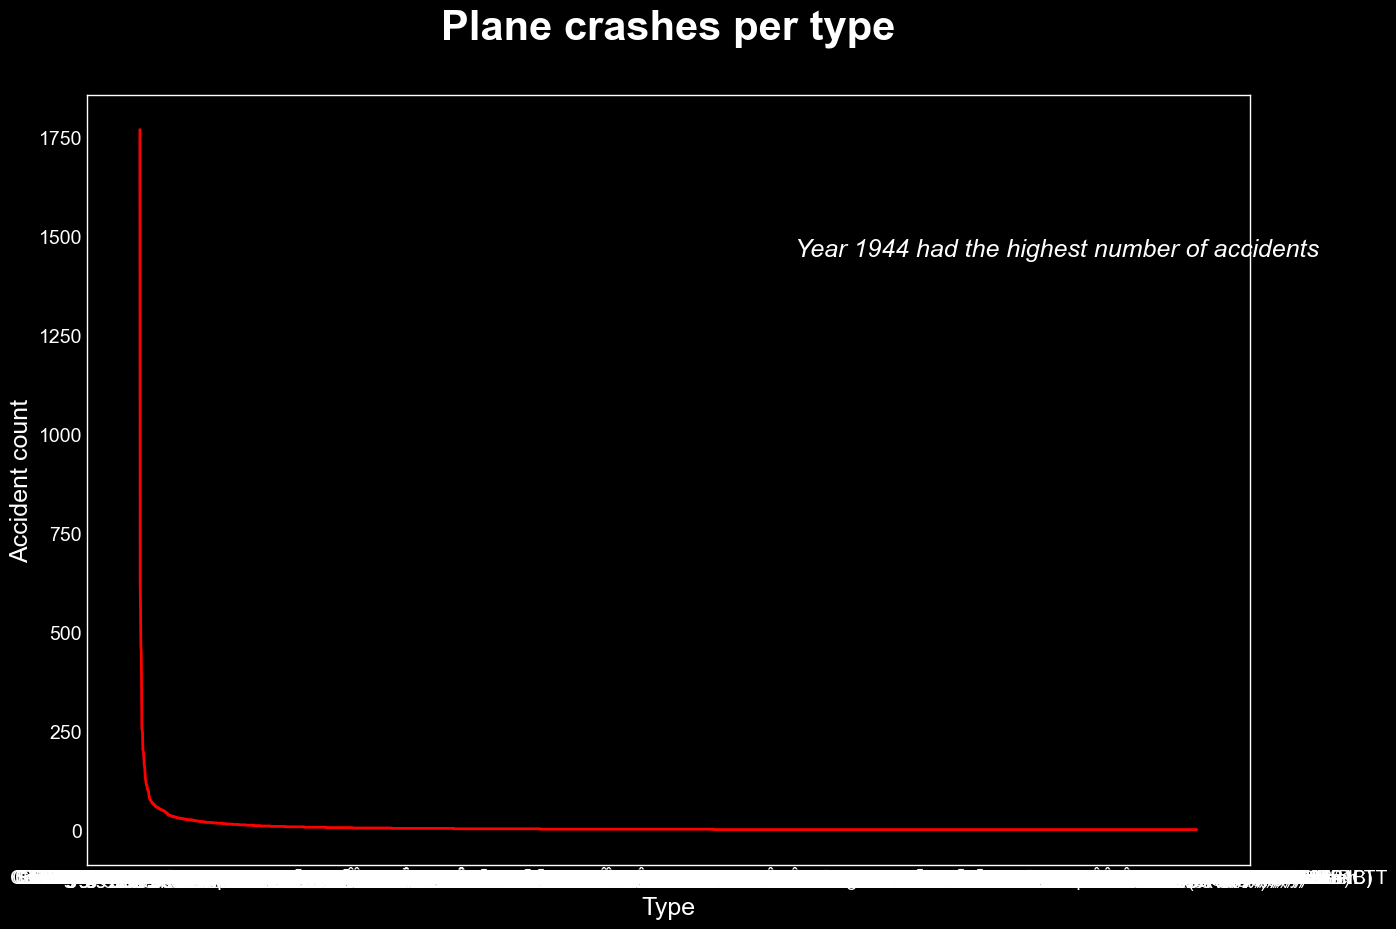

In [93]:
plt.style.use('dark_background')
plt.figure(figsize = (15, 10))

accident_count_by_type = filtered_df['type'].value_counts()
top_type = accident_count_by_type.head(10)

plt.plot(accident_count_by_type.index, accident_count_by_type.values, linewidth=2, color='red')
plt.xlabel("Type", size = 18)
plt.ylabel("Accident count", size = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.title("Plane crashes per type", size = 30, fontweight='bold',pad=40)
plt.annotate("Year 1944 had the highest number of accidents", xy = (1975, 1450), size = 18, fontstyle='italic')
plt.show()